In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import pandas as pd

In [2]:
df_ori: dict[str, pd.DataFrame] = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\ori_dec_acc_traj_s.pkl')
df_clb: dict[str, pd.DataFrame] = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_traj_s.pkl')
df_param: pd.DataFrame = pd.read_pickle(r'E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_param_df.pkl')

In [3]:
from trasim_simplified.util.hysteresis.intensity import cal_sv_intensity
from trasim_simplified.core.constant import TrackInfo as TI, Prefix, CFM
from trasim_simplified.core.kinematics.cfm import get_cf_default_param, get_cf_equilibrium

ids = list(df_ori["dec"].keys())
sv_intensity = {}
ori_sv_intensity = {}
cf_name = CFM.IDM

cf_e = get_cf_equilibrium(cf_name)

for id_ in ids:
    cf_param = {name: df_param[df_param[TI.v_ID] == id_][name].iloc[0] for name in get_cf_default_param(cf_name).keys()}
    sv_intensity[id_] = cal_sv_intensity(
        df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x], df_clb["dec"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x], df_clb["acc"][id_][TI.v],
        cf_e, cf_param)
    ori_sv_intensity[id_] = cal_sv_intensity(
        df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x], df_ori["dec"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x], df_ori["acc"][id_][TI.v],
        cf_e, cf_param)

sv_intensity

{280: (-6.898032210932553,
  7.066648961661882,
  0.16861675072932888,
  6.178827443335111,
  6.933655551178845,
  -0.16893940418288114,
  2.576167998417019,
  13.703230534746494,
  182,
  154),
 282: (-4.238126082880501,
  12.601416318188393,
  8.363290235307893,
  4.982530890619106,
  10.766473772541877,
  0.9868499091273953,
  2.285737272721422,
  13.041435690268454,
  308,
  188),
 298: (0.31619957995239345,
  20.612181630386672,
  20.928381210339065,
  0.5145435697228533,
  20.379431170491028,
  9.74699432044136,
  1.1025487916997836,
  12.217269669149443,
  172,
  166),
 302: (-4.29398200639529,
  7.1130263117606605,
  2.81904430536537,
  4.33537751308092,
  6.908256585429033,
  0.51777286187914,
  0.0,
  12.191996233394255,
  212,
  161),
 322: (-3.062041362899974,
  9.573780460191172,
  6.511739097291199,
  3.391287252216198,
  8.71392018497878,
  2.701667157838608,
  0.7038540996525326,
  11.860992057143275,
  149,
  151),
 363: (-5.711852345143895,
  7.462282978099104,
  1.75

In [4]:
df_intensity = pd.DataFrame([v for v in sv_intensity.values()], columns=["dec_vs", "acc_vs", "total_vs", "dec_ts", "acc_ts", "total_ts", "min_speed", "max_speed", "dec_step", "acc_step"])
df_intensity[TI.v_ID] = sv_intensity.keys()

df_ori_intensity = pd.DataFrame([v for v in ori_sv_intensity.values()], columns=["ori_dec_vs", "ori_acc_vs", "ori_total_vs", "ori_dec_ts", "ori_acc_ts", "ori_total_ts", "ori_min_speed", "ori_max_speed", "ori_dec_step", "ori_acc_step"])
df_ori_intensity[TI.v_ID] = ori_sv_intensity.keys()

df_param_merge: pd.DataFrame = df_param.merge(df_intensity, on=TI.v_ID)
df_param_merge: pd.DataFrame = df_param_merge.merge(df_ori_intensity, on=TI.v_ID)
df_param_merge

,s0,s1,v0,T,omega,d,delta,v_ID,ObjV,dec_vs,...,ori_dec_vs,ori_acc_vs,ori_total_vs,ori_dec_ts,ori_acc_ts,ori_total_ts,ori_min_speed,ori_max_speed,ori_dec_step,ori_acc_step
0,3.367405,-0.0,50.000000,0.586548,1.195860,0.318813,10.0,280,20.446222,-6.898032,...,-6.275039,8.554889,2.279850,5.972521,6.963838,0.079577,2.513798e+00,13.703231,182,160
1,2.188234,0.0,14.898263,0.140734,2.226179,1.893512,1.0,282,72.459121,-4.238126,...,-5.379298,11.567089,6.187790,6.106569,11.336636,3.412437,1.524000e+00,13.041436,159,191
2,6.313324,-0.0,16.045856,1.583061,0.845246,9.671251,9.0,298,54.787953,0.316200,...,2.016685,22.360357,24.377042,-0.297760,21.941280,10.466952,4.310065e-05,12.217270,211,187
3,0.879316,-0.0,32.721860,0.672054,1.656269,3.744626,1.0,302,25.827953,-4.293982,...,-3.716369,6.747243,3.030874,4.257521,6.668655,0.885844,7.130644e-01,12.191996,208,185
4,4.602900,0.0,41.824750,1.477022,1.692826,8.403208,3.0,322,33.869920,-3.062041,...,-1.580528,10.327279,8.746751,2.209528,9.512958,3.692418,2.918322e-10,11.860992,143,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.650314,0.0,44.028852,0.937281,1.371234,4.418636,1.0,2761,41.097679,-1.573571,...,-1.204857,10.790669,9.585812,1.964973,6.655990,2.556118,8.002648e-09,13.718963,292,322
129,4.003811,0.0,19.466078,1.156578,1.227376,9.999991,2.0,2764,34.202032,-1.794104,...,-1.120051,7.755308,6.635257,3.451857,6.773055,1.474431,1.668238e-05,12.191975,370,344
130,4.889622,-0.0,22.636509,0.376377,1.576178,0.714813,1.0,2775,4.447199,-6.206436,...,-5.589159,6.538788,0.949629,4.821010,6.124509,2.077427,1.521900e-07,9.143919,88,150
131,1.246643,0.0,14.800041,0.995808,0.868858,0.103238,3.0,2779,49.210656,-8.156576,...,-1.944397,4.547359,2.602962,6.432846,4.061798,-2.048762,6.525503e-05,11.034918,315,226


In [5]:
df_param_merge[[*list(get_cf_default_param(cf_name).keys()), "total_vs", "total_ts"]].corr(method="spearman")

,v0,s0,s1,delta,T,omega,d,total_vs,total_ts
v0,1.000000,0.046633,NaN,0.013604,0.174726,-0.092246,0.162263,0.090630,0.028842
s0,0.046633,1.000000,NaN,0.239646,-0.126428,0.174132,-0.168008,0.021470,-0.060406
s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delta,0.013604,0.239646,NaN,1.000000,0.171243,-0.128383,-0.140135,-0.020609,-0.044834
T,0.174726,-0.126428,NaN,0.171243,1.000000,-0.244124,0.140131,0.299104,0.343230
omega,-0.092246,0.174132,NaN,-0.128383,-0.244124,1.000000,0.100330,-0.590830,-0.508924
d,0.162263,-0.168008,NaN,-0.140135,0.140131,0.100330,1.000000,0.374314,0.321368
total_vs,0.090630,0.021470,NaN,-0.020609,0.299104,-0.590830,0.374314,1.000000,0.636317
total_ts,0.028842,-0.060406,NaN,-0.044834,0.343230,-0.508924,0.321368,0.636317,1.000000


In [6]:
df_param.mean()

s0          3.672634
s1          0.000000
v0         27.428640
T           1.077517
omega       2.708829
d           5.060789
delta       4.654135
v_ID     1719.969925
ObjV       37.035501
dtype: float64

Text(0.5, 1.0, 'v_ID: 2633')

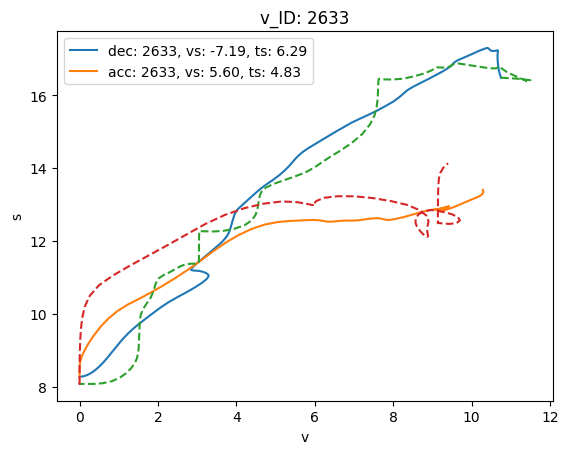

In [6]:
import random

id_ = random.choice(ids)
id_ = 2633

plt.xlabel("v")
plt.ylabel("s")
plt.plot(df_clb["dec"][id_][TI.v], df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x])
plt.plot(df_clb["acc"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x])
plt.plot(df_ori["dec"][id_][TI.v], df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x], linestyle="--")
plt.plot(df_ori["acc"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x], linestyle="--")
plt.legend([f"dec: {id_}, vs: {df_param_merge[df_param_merge[TI.v_ID] == id_]['dec_vs'].iloc[0]:.2f},"
            f" ts: {df_param_merge[df_param_merge[TI.v_ID] == id_]['dec_ts'].iloc[0]:.2f}",
            f"acc: {id_}, vs: {df_param_merge[df_param_merge[TI.v_ID] == id_]['acc_vs'].iloc[0]:.2f},"
            f" ts: {df_param_merge[df_param_merge[TI.v_ID] == id_]['acc_ts'].iloc[0]:.2f}"])
plt.title(f"v_ID: {id_}")

In [7]:
df_param_merge.to_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge.pkl")
df_param_merge.to_csv(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge.csv", index=False)

array([[<Axes: title={'center': 's0'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 'v0'}>, <Axes: title={'center': 'T'}>,
        <Axes: title={'center': 'omega'}>],
       [<Axes: title={'center': 'd'}>, <Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'v_ID'}>,
        <Axes: title={'center': 'ObjV'}>,
        <Axes: title={'center': 'dec_vs'}>],
       [<Axes: title={'center': 'acc_vs'}>,
        <Axes: title={'center': 'total_vs'}>,
        <Axes: title={'center': 'dec_ts'}>,
        <Axes: title={'center': 'acc_ts'}>,
        <Axes: title={'center': 'total_ts'}>],
       [<Axes: title={'center': 'min_speed'}>,
        <Axes: title={'center': 'max_speed'}>,
        <Axes: title={'center': 'dec_step'}>,
        <Axes: title={'center': 'acc_step'}>,
        <Axes: title={'center': 'ori_dec_vs'}>],
       [<Axes: title={'center': 'ori_acc_vs'}>,
        <Axes: title={'center': 'ori_total_vs'}>,
        <Axes: title={'center': 'ori_dec_ts'}>,
    

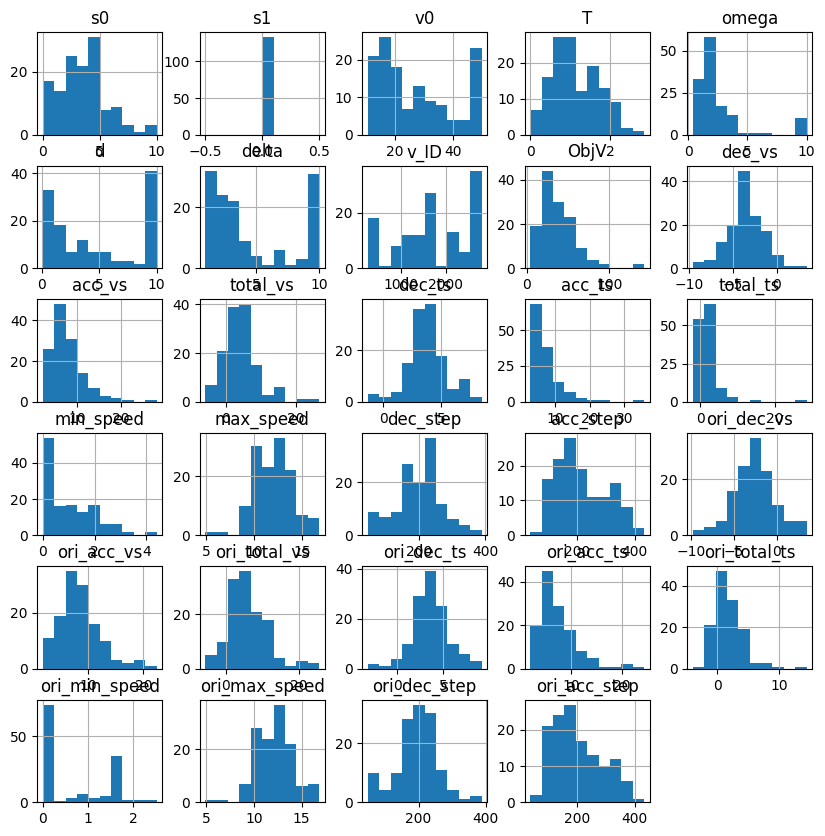

In [8]:
df_param_merge.hist(figsize=(10, 10))